In [1]:
from sklearn import datasets
import numpy as np
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # from chapter_2 -> project root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
np.unique(y)

array([0, 1, 2])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [5]:
np.bincount(y_test)  # count number of values in array - here same number means that set have same proportions of the classes (class balance)

array([15, 15, 15])

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # calculate mean and std
X_train_std = sc.transform(X_train)  # transform
X_test_std = sc.transform(X_test)  # transform based on train mean and std

In [7]:
from sklearn.linear_model import Perceptron

sklearn_perceptron = Perceptron(eta0=0.1, random_state=1)
sklearn_perceptron.fit(X_train_std, y_train)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.1
,n_jobs,None
,random_state,1


In [8]:
y_pred = sklearn_perceptron.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [10]:
print('Accuracy: %.3f' % sklearn_perceptron.score(X_test_std, y_test))

Accuracy: 0.978


In [11]:
help(Perceptron)

Help on class Perceptron in module sklearn.linear_model._perceptron:

class Perceptron(sklearn.linear_model._stochastic_gradient.BaseSGDClassifier)
 |  Perceptron(*, penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)
 |
 |  Linear perceptron classifier.
 |
 |  The implementation is a wrapper around :class:`~sklearn.linear_model.SGDClassifier`
 |  by fixing the `loss` and `learning_rate` parameters as::
 |
 |      SGDClassifier(loss="perceptron", learning_rate="constant")
 |
 |  Other available parameters are described below and are forwarded to
 |  :class:`~sklearn.linear_model.SGDClassifier`.
 |
 |  Read more in the :ref:`User Guide <perceptron>`.
 |
 |  Parameters
 |  ----------
 |
 |  penalty : {'l2','l1','elasticnet'}, default=None
 |      The penalty (aka regularization term) to

/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/home/domin/learning/MachineLearningWithPytorch/visualization/visualization.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test == cl, 0],


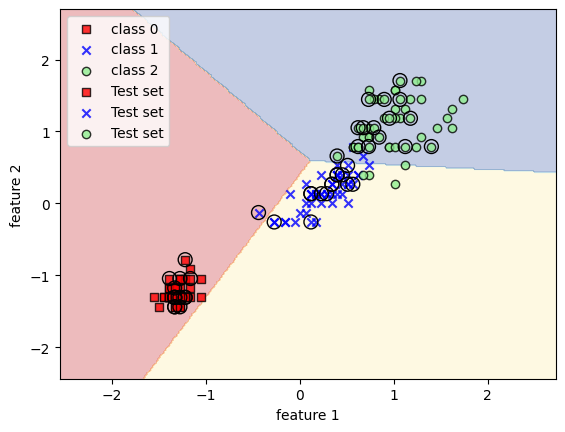

In [12]:
from visualization.visualization import plot_decision_regions, plot_data_universtal


plot_decision_regions(X_train_std, y_train, classifier=sklearn_perceptron)
plot_data_universtal(X_train_std, y_train, X_test=X_test_std, y_test=y_test)